<a href="https://colab.research.google.com/github/haligene109/Eugen/blob/main/Activity_Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this task, you will do the follow
* Get the dataset (pizza_steak)
* Use CNN with TensorFlow
* Steps in modelling an end-to-end binary classification with CNNs
   * Prepare the data
   * Create a CNN
   * Compile a model
   * Fit a model
   * Evaluate a model
   * Improve a model
   * Make predictions with the trainned model
   * Save the model
* An end-to-end multi-class image classification

In [25]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2023-11-29 10:53:37.584106


**Import the data**
* Google Food101 dataset: https://www.kaggle.com/datasets/dansbecker/food-101
   * This collection has 101 different categories of 101,000 real-world images of food dishes with 1000 images for each category.
   * Firts, let's use pizza and steak categories to build a binary classifier
   * We are using preprocessed dataset.
     * For details about preprocessing steps see: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

In [26]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip # Most of the time, you will not get a preprocessed dataset to download and use directly. Refer to details about data preprocessing in the link given above
                                                                                  #Unzip the downloaded file

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-11-29 10:53:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.170.207, 173.194.174.207, 74.125.23.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  26.1MB/s    in 4.9s    

2023-11-29 10:53:46 (21.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



**Understanding your dataset**.
* This requires visualising the data you downloaded:
  * The train directory, which contains images in the training dataset
  * The test directory, which contains images in the test dataset

In [27]:
!ls pizza_steak

test  train


In [28]:
!ls pizza_steak/train/

pizza  steak


You can get class names with lists of classess

In [29]:
!ls pizza_steak/train/steak/  # Inside steak directory

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [30]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


**We can start with 50% of the dataset**

In [31]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak")) # How many train pizza and steaks images?

num_steak_images_train

750

In [32]:
number_of_steak_test_images = len(os.listdir("pizza_steak/test/steak")) # How many train pizza and steaks images?

In [33]:
number_of_steak_test_images

250

Keep visualising your dataset

In [34]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [35]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


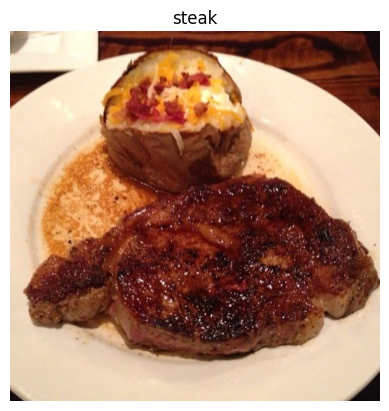

In [36]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [37]:
# View the img, computers see this image in the form of tensors
img

array([[[192, 166, 149],
        [190, 164, 147],
        [189, 162, 143],
        ...,
        [ 17,   4,  13],
        [ 19,   6,  15],
        [ 20,   7,  16]],

       [[189, 163, 146],
        [190, 165, 145],
        [189, 162, 143],
        ...,
        [ 19,   6,  15],
        [ 19,   6,  15],
        [ 20,   7,  16]],

       [[185, 160, 140],
        [186, 161, 141],
        [186, 159, 140],
        ...,
        [ 21,   8,  17],
        [ 21,   8,  17],
        [ 20,   7,  16]],

       ...,

       [[ 18,  12,  12],
        [ 17,  11,  11],
        [ 15,  11,  10],
        ...,
        [ 16,  11,  15],
        [ 14,   9,  13],
        [ 13,   8,  12]],

       [[ 17,  12,   9],
        [ 17,  12,   9],
        [ 18,  13,  10],
        ...,
        [ 15,  10,  14],
        [ 14,   9,  13],
        [ 14,   9,  13]],

       [[ 16,  11,   7],
        [ 17,  12,   8],
        [ 18,  13,  10],
        ...,
        [ 14,   9,  13],
        [ 14,   9,  13],
        [ 15,  10,  14]]

In [38]:
# View the image shape and the colour channels
img.shape # returns (width, height, colour channels)

(512, 512, 3)

In [39]:
# Get all the pixel values between 0 & 1. This is to normalise the pixels values to some numbers between 0 and 1
img/255.

array([[[0.75294118, 0.65098039, 0.58431373],
        [0.74509804, 0.64313725, 0.57647059],
        [0.74117647, 0.63529412, 0.56078431],
        ...,
        [0.06666667, 0.01568627, 0.05098039],
        [0.0745098 , 0.02352941, 0.05882353],
        [0.07843137, 0.02745098, 0.0627451 ]],

       [[0.74117647, 0.63921569, 0.57254902],
        [0.74509804, 0.64705882, 0.56862745],
        [0.74117647, 0.63529412, 0.56078431],
        ...,
        [0.0745098 , 0.02352941, 0.05882353],
        [0.0745098 , 0.02352941, 0.05882353],
        [0.07843137, 0.02745098, 0.0627451 ]],

       [[0.7254902 , 0.62745098, 0.54901961],
        [0.72941176, 0.63137255, 0.55294118],
        [0.72941176, 0.62352941, 0.54901961],
        ...,
        [0.08235294, 0.03137255, 0.06666667],
        [0.08235294, 0.03137255, 0.06666667],
        [0.07843137, 0.02745098, 0.0627451 ]],

       ...,

       [[0.07058824, 0.04705882, 0.04705882],
        [0.06666667, 0.04313725, 0.04313725],
        [0.05882353, 0

Use the link below to see components of a CNN and example to show how you may use input and layers:
https://drive.google.com/file/d/1lqEMfQtzUzN-v9ylQ8ENaK90eCzdTmL1/view?usp=sharing

Having visualised the dataset, we can now perform an end-to-end ML modelling task.

Examples of end-to-end CNN classification modelling tasks

** CNN classification modelling**
* Create the model
* Compile the model
* Fit the model

Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer)

* The convolution layers"2D" Conv2D means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
* filters - these are the number of "feature extractors" that will be moving over our images.
* kernel_size - the size of our filters, for instance, a kernel_size of (3, 3) (or just 3) means each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
* stride - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
* padding - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide be divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.
* steps_per_epoch - this is the number of batches a model will go through per epoch, in this case, we want our model to go through all batches so it's equal to the length of train_data (1500 images in batches of 32 = 1500/32 = ~47 steps)
* validation_steps - same as above, except for the validation_data parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 8s 122ms/step - loss: 0.6130 - accuracy: 0.6373 - val_loss: 0.4120 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 5s 105ms/step - loss: 0.4496 - accuracy: 0.7920 - val_loss: 0.3677 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 5s 105ms/step - loss: 0.3925 - accuracy: 0.8300 - val_loss: 0.3630 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3463 - accuracy: 0.8567 - val_loss: 0.3252 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 5s 105ms/step - loss: 0.2789 - accuracy: 0.8987 - val_loss: 0.3360 - val_accuracy: 0.8480


After 5 epochs, our model_1 got ~86% accuaracy on the training set and ~86% accuracy on the test set (see below). However, this model only went through a binary classificaiton problem, not all of the 101 classes in the Food101 dataset, so we can't directly compare these metrics. The good news is that so far so good because the model is learning and making some sense of the image features.

model_1 is similar to https://poloclub.github.io/cnn-explainer/

In [41]:
# You can also use evaluate() to to valuate on the model of test dataset
model_1.evaluate(valid_data)


16/16 [==============================] - 1s 78ms/step - loss: 0.3360 - accuracy: 0.8480


[0.3360218107700348, 0.8479999899864197]

In [42]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-11-29 10:55:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  7.85MB/s    in 0.2s    

2023-11-29 10:55:11 (7.85 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



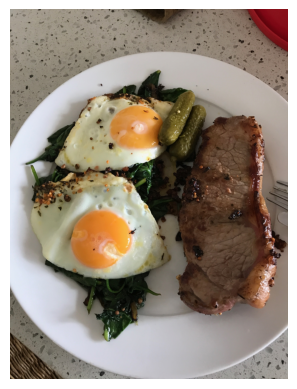

In [43]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

We have fitted model_1. It's architecture, see below, is similar to the CNN explainer: https://poloclub.github.io/cnn-explainer/

⚓ Do you notice that you have exactly same architecture as CNN explainer? Compaire names of layers in CNN explainer and in the summary of model_1.

In [44]:
# Check out the layers in our model
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

We have used ImageDataGenerator class and flow_from_directory() method for data processing. Read about the ImageDataGenerator class on https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator and the flow_from_directory() method on https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory, and see what
* read about the batch_size parameter  
* read about the target_size parameter


You should also read about Conv2D layer on https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D as well as MaxPool2D on https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling2D

**Second** **Trial** **and** **Error** **Modelling**

ANN can be adapted to different problems. It's all about experimenting. Let's see how model_1 might work differently with the data we have

Experimenting means changing parameters and run to see if there could be different results. All parameters can be changed except the dataset (images) and and the input shape (the ANN need to know the shape of images.)

It is a common practice to reshape images all to one size. In this activity we are resizing the images to (224, 224, 3), meaning a height and width of 224 pixels and a depth of 3 for the RGB colour channels

model_1 achieves accuracy of 86% on training and test dataset, but this on binary classification with use of 50% of the dataset. We wish to undergo multiple experiments with the baseline being 50%, so the aim is to improve the models performance.

In model-2, we are trying to redo model_1 differently.

In [45]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow basic model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 105ms/step - loss: 1.2332 - accuracy: 0.4940 - val_loss: 0.7055 - val_accuracy: 0.5040
Epoch 2/5
47/47 [==============================] - 5s 106ms/step - loss: 0.6964 - accuracy: 0.5420 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 105ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 103ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 104ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


Model_2 attains accuracy of 50% on the training and validation dataset, which is a problem with this binary classification, it is guessing.

check model_2 architecture and compare with https://poloclub.github.io/cnn-explainer/

In [46]:
# model_2 architecture
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 4)                 602116    
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In model_2, we can notice moe than double number of trainable parameters. However, model_2 has far low performance compared to model_1.

Any ideas about how to improve model-2? There are many ways to improve the ANNs models
* One quick way is to increase the number of hidden layers
* Another quick way is to increase the number of neurons in layers
* Many other ways exist
Now let's add 1 hidden layer and increase the number of hidden neurons (hidden layer neurons) from 4 to 100.

In [47]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra hidden layer and increase the number of hidden neurons from 4 to 100 in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 102ms/step - loss: 3.0096 - accuracy: 0.6173 - val_loss: 1.2374 - val_accuracy: 0.6820
Epoch 2/5
47/47 [==============================] - 5s 108ms/step - loss: 1.2539 - accuracy: 0.6793 - val_loss: 0.9919 - val_accuracy: 0.7160
Epoch 3/5
47/47 [==============================] - 5s 104ms/step - loss: 0.6294 - accuracy: 0.7500 - val_loss: 0.6505 - val_accuracy: 0.7140
Epoch 4/5
47/47 [==============================] - 5s 104ms/step - loss: 0.5784 - accuracy: 0.7400 - val_loss: 0.7854 - val_accuracy: 0.7140
Epoch 5/5
47/47 [==============================] - 5s 103ms/step - loss: 0.5278 - accuracy: 0.7933 - val_loss: 1.7880 - val_accuracy: 0.5600


The model is learning! the model attains around 72% on the training dataset and 70% on the test dataset. Compared to model_2, model_3 is learning and it seems adding 1 hidden layer and more  96 neurons has helped the model to improve its performance.

Let's see model_3 parameters

In [48]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_6 (Dense)             (None, 100)               15052900  
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Notice the number of trainable parameters! more than 15 million. Can you draw a conclusion on the power of CNN model, here say, model_1 given its performance for 31,000 trainable parameters and 62,000 parameters in model_2?

The CNN model, for instance model_1 have higher ability to learn patterns with less number of parameters.

**Mastery of Binary Classification**

Now that we know that modelling ANN is an experimental process with the aim of attaining higher model performance

In  the next step, we will seek mastery of binary classification with all the necessary steps with the aim of developing a CNN model, use it and save it. After this long excercise, we will perform multi-class classification

**Key Steps**
* Visualising the data
* Preprocess the data for modelling
* Create a CNN model
* Fit the model
* Evaluate the model
* Tune different parameters to improve model
* Repeat some steps until satisfied with the performance
* Use the model
*  Save the model

1. Data was imported, no need to repeat this first step

In [49]:
# import zipfile

# # Download zip file of pizza_steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


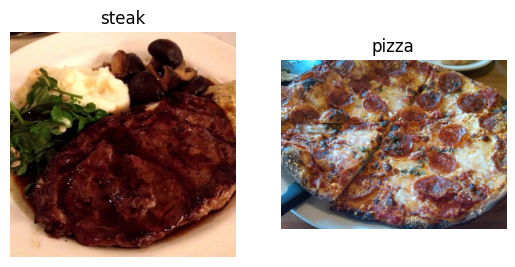

In [50]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

2 Preprocess the data
* In ML projects, creating a training and testing dataset is one of the most important steps. Our dataset is already split into training and test dataset. We may have to create a validation dataset.

The dataset need to have train and test directories with folders in each class for each class

In [51]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Turn the dataset into batches where a batch is a small subset of the dataset that a model learns from during the training process. An example is when you ave 10,000 images and instead of the ML model trying to learn from all of them to find petterns, a model might learn from only 32 images at a time. 32 is a batch size.

So we need to turn our dataset into batches. This requires to create an instance of ImageDataGenerator for our datasets.

In [52]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

The ImageDataGenerator class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

You might've noticed the rescale parameter. This is one example of the transformations we're doing.

Remember from before how we imported an image and it's pixel values were between 0 and 255?

The rescale parameter, along with 1/255. is like saying "divide all of the pixel values by 255". This results in all of the image being imported and their pixel values being normalized (converted to be between 0 and 1).

Now we've got a couple of ImageDataGenerator instances, we can load our images from their respective directories using the flow_from_directory method

In [74]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


Looks like our training dataset has 1500 images belonging to 2 classes (pizza and steak) and our test dataset has 500 images also belonging to 2 classes.

Some things to here:

Due to how our directories are structured, the classes get inferred by the subdirectory names in train_dir and test_dir.

The target_size parameter defines the input size of our images in (height, width) format.

The class_mode value of 'binary' defines our classification problem type. If we had more than two classes, we would use 'categorical'.

The batch_size defines how many images will be in each batch, we've used 32 which is the same as the default.

We can take a look at our batched images and labels by inspecting the train_data object.

In [75]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

It seems our images and labels are in batches of 32.

See what the images look like.

In [76]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.6313726 , 0.48627454, 0.18039216],
          [0.6       , 0.45882356, 0.15294118],
          [0.6       , 0.45882356, 0.16078432],
          ...,
          [0.8588236 , 0.7411765 , 0.5294118 ],
          [0.79215693, 0.6745098 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.5254902 ]],
 
         [[0.627451  , 0.48235297, 0.1764706 ],
          [0.6509804 , 0.5058824 , 0.20000002],
          [0.6156863 , 0.47450984, 0.1764706 ],
          ...,
          [0.79215693, 0.6745098 , 0.46274513],
          [0.8470589 , 0.7294118 , 0.5254902 ],
          [0.8235295 , 0.7019608 , 0.5176471 ]],
 
         [[0.6392157 , 0.48627454, 0.18431373],
          [0.6039216 , 0.45098042, 0.14901961],
          [0.59607846, 0.44705886, 0.15294118],
          ...,
          [0.8078432 , 0.6901961 , 0.4784314 ],
          [0.86274517, 0.74509805, 0.5411765 ],
          [0.7960785 , 0.6784314 , 0.48235297]],
 
         ...,
 
         [[0.1254902 , 0.05490196, 0.        ],
          [0.12941

Due to our rescale parameter, the images are now in (224, 224, 3) shape tensors with values between 0 and 1.

How about the labels?

In [77]:
# View the first batch of labels
labels

array([8., 6., 1., 8., 0., 3., 7., 5., 4., 2., 5., 6., 2., 5., 6., 8., 6.,
       4., 1., 2., 2., 6., 0., 0., 4., 4., 7., 5., 7., 3., 0., 7.],
      dtype=float32)

Due to the class_mode parameter being 'binary' our labels are either 0 (pizza) or 1 (steak).

Now that our data is ready, our model is going to try and figure out the patterns between the image tensors and the labels

3. Create a model
You might be wondering what your default model architecture should be.

And the truth is, there's many possible answers to this question.

A simple heuristic for computer vision models is to use the model architecture which is performing best on ImageNet (a large collection of diverse images to benchmark different computer vision models).

However, to begin with, it's good to build a smaller model to acquire a baseline result which you try to improve upon.

in our case, let's take a smaller version of the model that can be found on the CNN explainer website (model_1 from above) and build a 3 layer convolutional neural network.

In [78]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [79]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

Great thing! We've got a simple convolutional neural network architecture ready to go.

And it follows the typical CNN structure of:

Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output

Now our model is ready, let's compile it

In [80]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

4. Fit a model¶
Our model is compiled, time to fit it.

You'll notice two new parameters here:

steps_per_epoch - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of train_data (1500 images in batches of 32 = 1500/32 = ~47 steps)
validation_steps - same as above, except for the validation_data parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [81]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(235, 79)

In [82]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 26s 101ms/step - loss: -1145988864.0000 - accuracy: 0.1001 - val_loss: -7255987200.0000 - val_accuracy: 0.1000
Epoch 2/5
235/235 [==============================] - 24s 102ms/step - loss: -63580684288.0000 - accuracy: 0.1000 - val_loss: -179214073856.0000 - val_accuracy: 0.1000
Epoch 3/5
235/235 [==============================] - 24s 102ms/step - loss: -505174163456.0000 - accuracy: 0.1000 - val_loss: -994219196416.0000 - val_accuracy: 0.1000
Epoch 4/5
235/235 [==============================] - 24s 103ms/step - loss: -1915224457216.0000 - accuracy: 0.1000 - val_loss: -3139203497984.0000 - val_accuracy: 0.1000
Epoch 5/5
235/235 [==============================] - 24s 101ms/step - loss: -5028357603328.0000 - accuracy: 0.1000 - val_loss: -7388155346944.0000 - val_accuracy: 0.1000



5. Evaluate the model¶
Oh yeah! Looks like our model is learning something.

Let's check out its training curves.

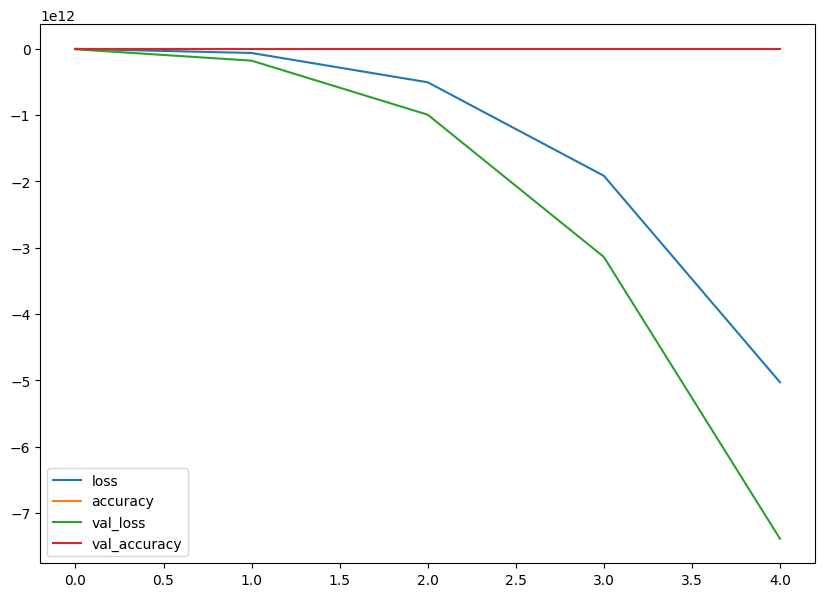

In [83]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

Judging by our loss curves, it looks like our model is overfitting the training dataset.

To further inspect our model's training performance, let's separate the accuracy and loss curves.

In [84]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

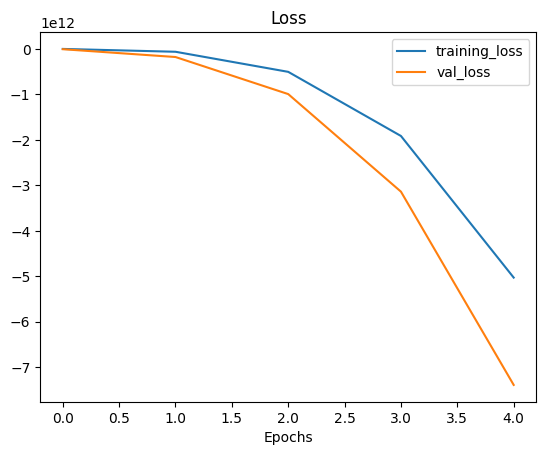

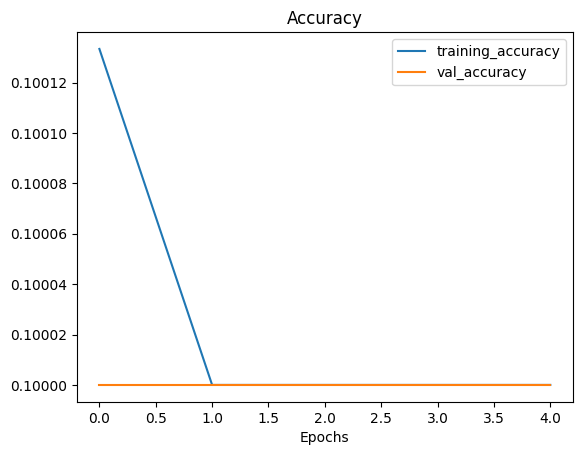

In [85]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

In [86]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_18 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_7 (Flatten)         (None, 475240)            0         
                                                                 
 dense_12 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


6. Adjust the model parameters¶
Fitting a machine learning model comes in 3 steps: 0. Create a basline.

* Beat the baseline by overfitting a larger model.
* Reduce overfitting.
So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:

* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.

But what we'll do instead is focus on getting our model's training curves to better align with eachother, in other words, we'll take on step 2.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

Not really...

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:

* A ConvNet with max pooling
* A ConvNet with max pooling and data augmentation
For the first model, we'll follow the modified basic CNN structure:

Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output

Let's built it. It'll have the same structure as model_4 but with a MaxPool2D() layer after each convolutional layer

In [87]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

we've got another layer type we haven't seen before.

If convolutional layers learn the features of an image you can think of a Max Pooling layer as figuring out the most important of those features. We'll see this an example of this in a moment.

In [88]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [89]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 25s 101ms/step - loss: -15848942.0000 - accuracy: 0.0997 - val_loss: -98296624.0000 - val_accuracy: 0.1000
Epoch 2/5
235/235 [==============================] - 23s 99ms/step - loss: -862026560.0000 - accuracy: 0.1000 - val_loss: -2432744192.0000 - val_accuracy: 0.1000
Epoch 3/5
235/235 [==============================] - 24s 101ms/step - loss: -6799701504.0000 - accuracy: 0.1000 - val_loss: -13457624064.0000 - val_accuracy: 0.1000
Epoch 4/5
235/235 [==============================] - 24s 102ms/step - loss: -25860857856.0000 - accuracy: 0.1000 - val_loss: -42303799296.0000 - val_accuracy: 0.1000
Epoch 5/5
235/235 [==============================] - 24s 101ms/step - loss: -68024037376.0000 - accuracy: 0.1000 - val_loss: -100006887424.0000 - val_accuracy: 0.1000



Okay, it looks like our model with max pooling (model_5) is performing worse on the training set but better on the validation set.

Before we checkout its training curves, let's check out its architecture.

In [90]:
# Check out the model architecture
model_5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 26, 26, 10)       


Do you notice what's going on here with the output shape in each MaxPooling2D layer?

It gets halved each time. This is effectively the MaxPooling2D layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest".

The bigger the pool_size parameter, the more the max pooling layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything.

The results of this pooling are seen in a major reduction of total trainable parameters (8,861 in model_5 and 477,431 in model_4)

Time to check out the loss curves.

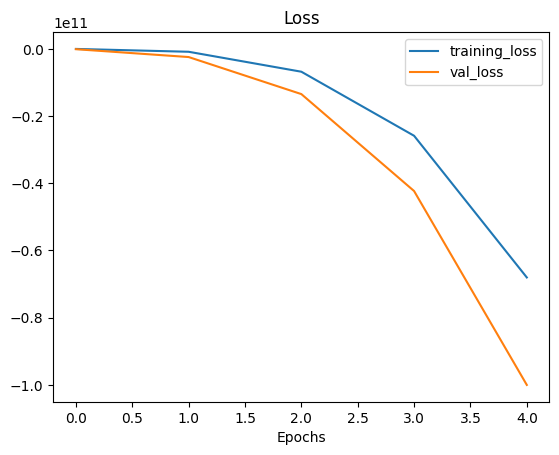

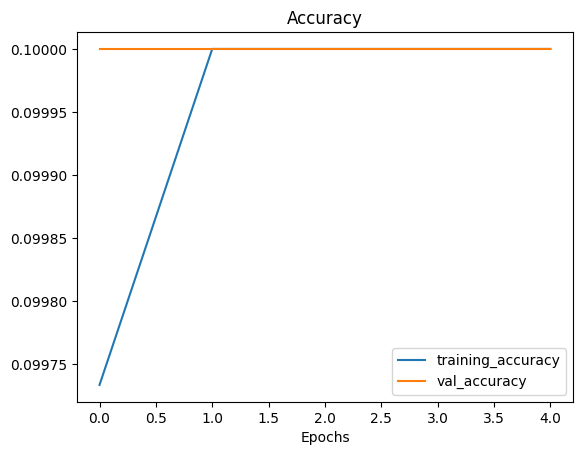

In [91]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)


Nice! We can see the training curves get a lot closer to eachother. However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

Time to dig into our bag of tricks and try another method of overfitting prevention, data augmentation.

First, we'll see how it's done with code then we'll discuss what it's doing.

To implement data augmentation, we'll have to reinstantiate our ImageDataGenerator instances.

In [92]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

In [93]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 7500 images belonging to 10 classes.
Non-augmented training images:
Found 7500 images belonging to 10 classes.
Unchanged test images:
Found 2500 images belonging to 10 classes.


Better than talk about data augmentation, how about we see it?

(remember our motto? visualize, visualize, visualize...)

In [94]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

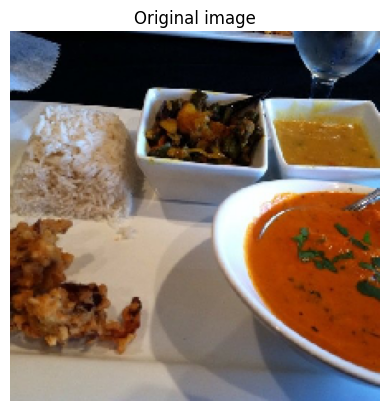

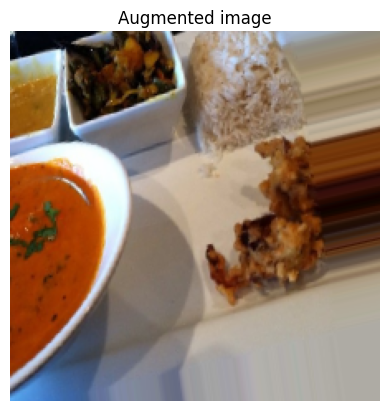

In [95]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

After going through a sample of original and augmented images, you can start to see some of the example transformations on the training images.

Notice how some of the augmented images look like slightly warped versions of the original image. This means our model will be forced to try and learn patterns in less-than-perfect images, which is often the case when using real-world images.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

As for how much to data augment, there's no set practice for this. Best to check out the options in the ImageDataGenerator class and think about how a model in your use case might benefit from some data augmentation.

Now we've got augmented data, let's try and refit a model on it and see how it affects training.

We'll use the same model as model_5.

In [96]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 94s 395ms/step - loss: -3640755.2500 - accuracy: 0.1000 - val_loss: -28024108.0000 - val_accuracy: 0.1000
Epoch 2/5
235/235 [==============================] - 93s 395ms/step - loss: -304465120.0000 - accuracy: 0.1000 - val_loss: -900217280.0000 - val_accuracy: 0.1000
Epoch 3/5
235/235 [==============================] - 94s 398ms/step - loss: -2421095680.0000 - accuracy: 0.1000 - val_loss: -4849696768.0000 - val_accuracy: 0.1000
Epoch 4/5
235/235 [==============================] - 93s 396ms/step - loss: -9351088128.0000 - accuracy: 0.1000 - val_loss: -15659254784.0000 - val_accuracy: 0.1000
Epoch 5/5
235/235 [==============================] - 93s 397ms/step - loss: -24646152192.0000 - accuracy: 0.1000 - val_loss: -37014097920.0000 - val_accuracy: 0.1000


It's because when we created train_data_augmented we turned off data shuffling using shuffle=False which means our model only sees a batch of a single kind of images at a time.

For example, the pizza class gets loaded in first because it's the first class. Thus it's performance is measured on only a single class rather than both classes. The validation data performance improves steadily because it contains shuffled data.

Since we only set shuffle=False for demonstration purposes (so we could plot the same augmented and non-augmented image), we can fix this by setting shuffle=True on future data generators.

You may have also noticed each epoch taking longer when training with augmented data compared to when training with non-augmented data (~25s per epoch vs. ~10s per epoch).

This is because the ImageDataGenerator instance augments the data as it's loaded into the model. The benefit of this is that it leaves the original images unchanged. The downside is that it takes longer to load them in.

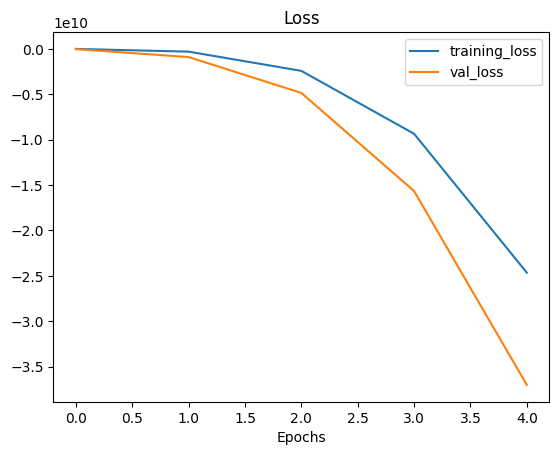

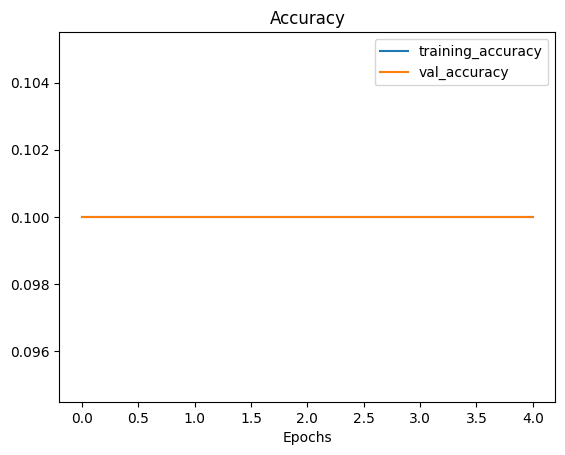

In [97]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

In [98]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 7500 images belonging to 10 classes.


In [99]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 95s 400ms/step - loss: -16791006.0000 - accuracy: 0.1001 - val_loss: -106894344.0000 - val_accuracy: 0.1000
Epoch 2/5
235/235 [==============================] - 94s 400ms/step - loss: -935489408.0000 - accuracy: 0.1000 - val_loss: -2690234368.0000 - val_accuracy: 0.1000
Epoch 3/5
235/235 [==============================] - 94s 398ms/step - loss: -7337761792.0000 - accuracy: 0.1000 - val_loss: -14799205376.0000 - val_accuracy: 0.1000
Epoch 4/5
235/235 [==============================] - 95s 402ms/step - loss: -28058198016.0000 - accuracy: 0.1000 - val_loss: -46982062080.0000 - val_accuracy: 0.1000
Epoch 5/5
235/235 [==============================] - 94s 402ms/step - loss: -73939075072.0000 - accuracy: 0.1000 - val_loss: -110773149696.0000 - val_accuracy: 0.1000


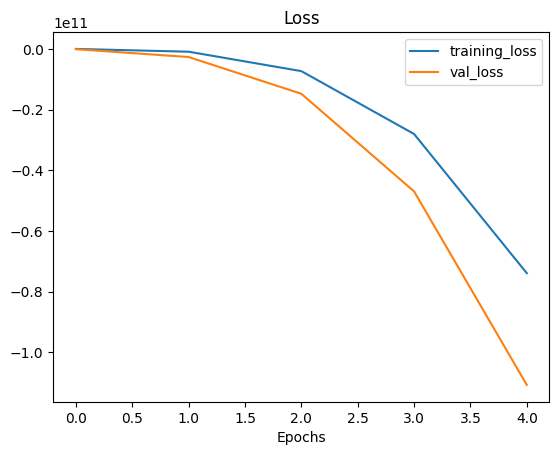

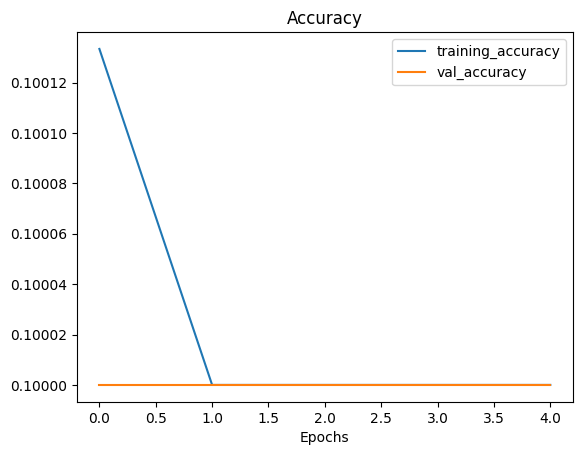

In [100]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)


7. Repeat until satisified
We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

Increase the number of model layers (e.g. add more convolutional layers).
Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
Train for longer (more epochs).
Finding an ideal learning rate.
Get more data (give the model more opportunities to learn).
Use transfer learning to leverage what another image model has learned and adjust it for our own use case.
Adjusting each of these settings (except for the last two) during model development is usually referred to as hyperparameter tuning.

You can think of hyperparameter tuning as simialr to adjusting the settings on your oven to cook your favourite dish. Although your oven does most of the cooking for you, you can help it by tweaking the dials.

Let's go back to right where we started and try our original model (model_1 or the TinyVGG architecture from CNN explainer).

**Multi_class Classification**

**Key Steps**
* Visualising the data
* Preprocess the data for modelling
* Create a CNN model
* Fit the model
* Evaluate the model
* Tune different parameters to improve model
* Repeat some steps until satisfied with the performance
* Use the model
*  Save the model

In [53]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-11-29 10:57:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.207, 142.251.170.207, 173.194.174.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  30.3MB/s    in 17s     

2023-11-29 10:57:24 (29.0 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [54]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 


In ML projects, creating a training and testing dataset is one of the most important steps. Our dataset is already split into training and test dataset. We may have to create a validation dataset.

* The dataset need to have train and test directories with folders in each class for each class

In [55]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


Get the class names from the subdirectories.

In [56]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']



Can we visualize an image from the training set?

Image shape: (512, 512, 3)


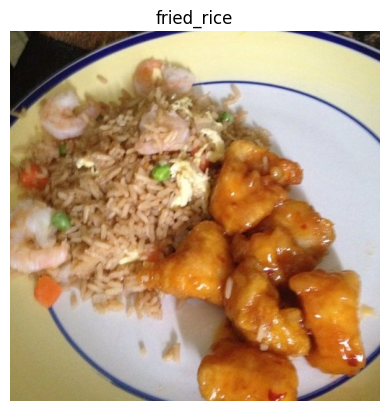

In [73]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name


2. Preprocess the data (prepare it for a model)¶
After going through a handful of images, it seems our data directories are setup correctly.

* Now is the time to preprocess the data.

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


As with binary classifcation, created image generators. This time, the main change is that we havechanged the class_mode parameter to 'categorical' because we're dealing with 10 classes of food images.

Everything else like rescaling the images, creating the batch size and target image size stay the same.


3. Create a model (start with a baseline)
We can use the same model we used for the binary classification problem for our multi-class classification problem with a couple of small things.

Namely:

Changing the output layer to use have 10 ouput neurons (the same number as the number of classes we have).
Changing the output layer to use 'softmax' activation instead of 'sigmoid' activation.
Changing the loss function to be 'categorical_crossentropy' instead of 'binary_crossentropy'.

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

4. Fit a model

Now, our a model is suitable for working with multiple classes, let's fit it to our data.

In [59]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 25s 102ms/step - loss: 2.1481 - accuracy: 0.2140 - val_loss: 2.0108 - val_accuracy: 0.2724
Epoch 2/5
235/235 [==============================] - 24s 101ms/step - loss: 1.9225 - accuracy: 0.3245 - val_loss: 1.8871 - val_accuracy: 0.3252
Epoch 3/5
235/235 [==============================] - 23s 100ms/step - loss: 1.6974 - accuracy: 0.4243 - val_loss: 1.8498 - val_accuracy: 0.3608
Epoch 4/5
235/235 [==============================] - 24s 100ms/step - loss: 1.3750 - accuracy: 0.5355 - val_loss: 2.0280 - val_accuracy: 0.3364
Epoch 5/5
235/235 [==============================] - 24s 101ms/step - loss: 0.9875 - accuracy: 0.6747 - val_loss: 2.2787 - val_accuracy: 0.3096


Why do you think each epoch takes longer than when working with only two classes of images?

It's because we're now dealing with more images than we were before. We've got 10 classes with 750 training images and 250 validation images each totalling 10,000 images. Where as when we had two classes, we had 1500 training images and 500 validation images, totalling 2000.

The intuitive reasoning here is the more data you have, the longer a model will take to find patterns.

In [60]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 6s 75ms/step - loss: 2.2787 - accuracy: 0.3096


[2.278715133666992, 0.30959999561309814]

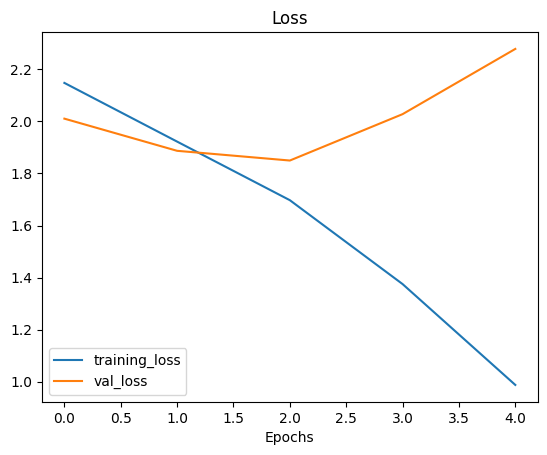

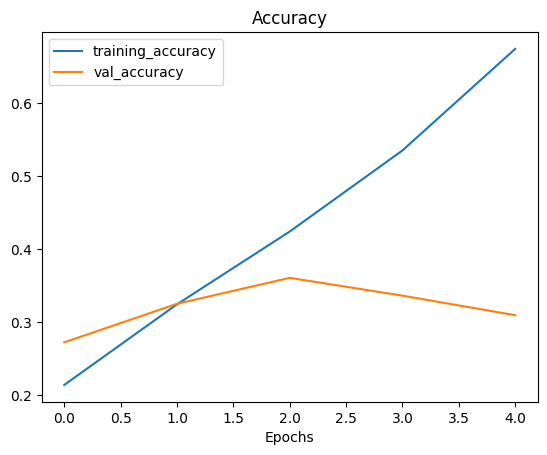

In [101]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_9)

In [61]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 25s 102ms/step - loss: 2.1162 - accuracy: 0.2367 - val_loss: 1.9698 - val_accuracy: 0.2936
Epoch 2/5
235/235 [==============================] - 24s 102ms/step - loss: 1.7808 - accuracy: 0.3900 - val_loss: 1.9538 - val_accuracy: 0.3280
Epoch 3/5
235/235 [==============================] - 24s 101ms/step - loss: 1.3669 - accuracy: 0.5540 - val_loss: 1.9736 - val_accuracy: 0.3408
Epoch 4/5
235/235 [==============================] - 24s 103ms/step - loss: 0.8237 - accuracy: 0.7507 - val_loss: 2.2252 - val_accuracy: 0.3216
Epoch 5/5
235/235 [==============================] - 24s 101ms/step - loss: 0.4029 - accuracy: 0.8928 - val_loss: 2.6439 - val_accuracy: 0.3068


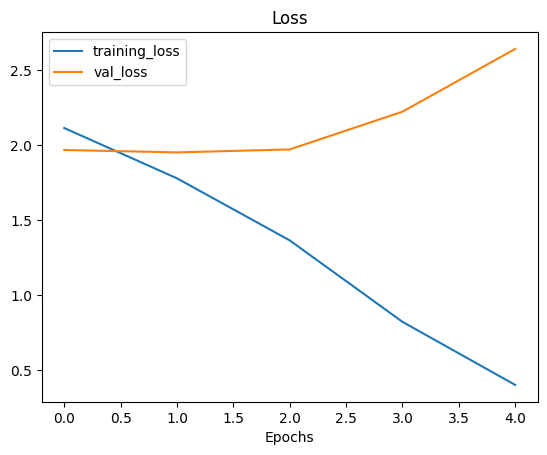

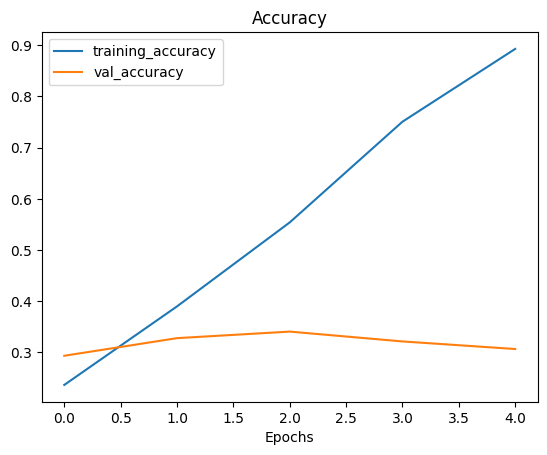

In [102]:
# Check out the loss curves of model_10
plot_loss_curves(history_10)

In [62]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [63]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 94s 395ms/step - loss: 2.1920 - accuracy: 0.1981 - val_loss: 2.1073 - val_accuracy: 0.2404
Epoch 2/5
235/235 [==============================] - 94s 400ms/step - loss: 2.0770 - accuracy: 0.2643 - val_loss: 1.9596 - val_accuracy: 0.3040
Epoch 3/5
235/235 [==============================] - 93s 397ms/step - loss: 2.0411 - accuracy: 0.2769 - val_loss: 1.8838 - val_accuracy: 0.3588
Epoch 4/5
235/235 [==============================] - 94s 402ms/step - loss: 2.0031 - accuracy: 0.3032 - val_loss: 1.9149 - val_accuracy: 0.3320
Epoch 5/5
235/235 [==============================] - 95s 402ms/step - loss: 1.9732 - accuracy: 0.3120 - val_loss: 1.9291 - val_accuracy: 0.3444


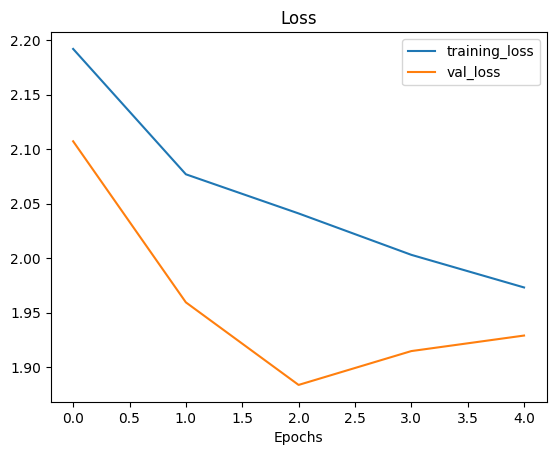

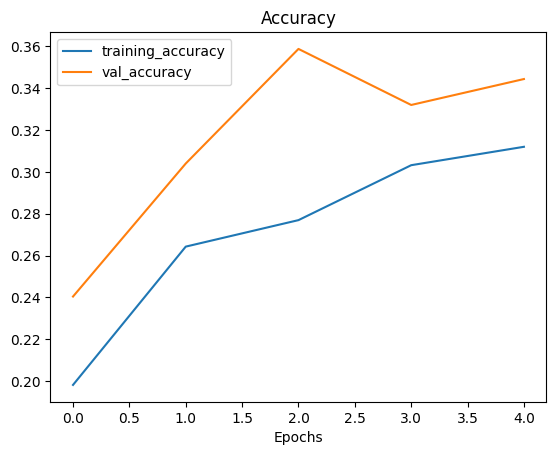

In [103]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11)

7. Repeat and Change hyperparameters until satisfied

We could keep going here. Restructuring our model's architecture, adding more layers, trying it out, adjusting the learning rate, trying it out, trying different methods of data augmentation, training for longer. But as you could image, this could take a fairly long time.

Good thing there's still one trick we haven't tried yet and that's transfer learning.

However, we'll save that for the next notebook where you'll see how rather than design our own models from scratch we leverage the patterns another model has learned for our own task.

In the meantime, let's make a prediction with our trained multi-class model.


**Making a prediction with our trained model**

What good is a model if you can't make predictions with it?

Let's first remind ourselves of the classes our multi-class model has been trained on and then we'll download some of own custom images to work with.

In [64]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

**Making use of our model**


The next stage is using the model for prediction anf finaly save and loading the model

Try to work on this...